In [2]:
##Required Imports for Dimension Reduction
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
##Code for summary statistics of data
bostonHousing_df = pd.read_csv('../../.venv/lib/Datasets/BostonHousing.csv')
bostonHousing_df = bostonHousing_df.rename(columns={'CAT.MEDV':'CAT_MEDV'})
bostonHousing_df.head()
bostonHousing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806,0.166008
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104,0.372456
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000,0.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000,0.000000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000,0.000000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000,0.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000,1.000000


In [6]:
#code for statistics of a single variable
print('Mean : ', bostonHousing_df.CRIM.mean())
print('Std. Dev : ', bostonHousing_df.CRIM.std())
print('Min : ', bostonHousing_df.CRIM.min())
print('Max : ', bostonHousing_df.CRIM.max())
print('Median : ', bostonHousing_df.CRIM.median())
print('Length : ', len(bostonHousing_df.CRIM))
print('Number of Missing Values : ', bostonHousing_df.CRIM.isnull().sum())


Mean :  3.613523557312254
Std. Dev :  8.60154510533249
Min :  0.00632
Max :  88.9762
Median :  0.25651
Length :  506
Number of Missing Values :  0


In [8]:
#Code to create a dataframe of previusly mentioned summary statistics
pd.DataFrame({'Mean': bostonHousing_df.mean(),
'Std. Dev': bostonHousing_df.std(),
'Min': bostonHousing_df.min(),
'Max': bostonHousing_df.max(),
'Median': bostonHousing_df.median(),
'Length': len(bostonHousing_df),
'Miss.Val': bostonHousing_df.isnull().sum(),
              })

,Mean,Std. Dev,Min,Max,Median,Length,Miss.Val
CRIM,3.613524,8.601545,0.00632,88.9762,0.25651,506,0
ZN,11.363636,23.322453,0.00000,100.0000,0.00000,506,0
INDUS,11.136779,6.860353,0.46000,27.7400,9.69000,506,0
CHAS,0.069170,0.253994,0.00000,1.0000,0.00000,506,0
NOX,0.554695,0.115878,0.38500,0.8710,0.53800,506,0
RM,6.284634,0.702617,3.56100,8.7800,6.20850,506,0
AGE,68.574901,28.148861,2.90000,100.0000,77.50000,506,0
DIS,3.795043,2.105710,1.12960,12.1265,3.20745,506,0
RAD,9.549407,8.707259,1.00000,24.0000,5.00000,506,0
TAX,408.237154,168.537116,187.00000,711.0000,330.00000,506,0


In [9]:
#Create a correlation table
bostonHousing_df.corr().round(2) ##.round() will round the statistics to 2 decimals

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CAT. MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,0.46,-0.39,-0.15
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,-0.41,0.36,0.37
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,0.60,-0.48,-0.37
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,-0.05,0.18,0.11
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,0.59,-0.43,-0.23
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,-0.61,0.70,0.64
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,0.60,-0.38,-0.19
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,-0.50,0.25,0.12
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,0.49,-0.38,-0.20
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,0.54,-0.47,-0.27


In [13]:
##Aggregation Methods

#aggregation by single variable using value_counts()
bostonHousing_df.CHAS.value_counts() #output is unique values of CHAS and the count of observations for each unique value in CHAS

CHAS
0    471
1     35
Name: count, dtype: int64

In [14]:
#aggregating by more than one variable using groupby()
bostonHousing_df['RM_bin'] = pd.cut(bostonHousing_df['RM'], #creates bins of size 1 for variable
                                    range(0,10), #chooses the range of the values in RM
                                    labels=False) #by default, resulting column is categorical, this determines integers instead
bostonHousing_df.groupby(['RM_bin', 'CHAS'])['MEDV'].mean() #first groups by the chosen variables anf then is analyzed in comparison to the average of MEDV value

RM_bin  CHAS
3       0       25.300000
4       0       15.407143
5       0       17.200000
        1       22.218182
6       0       21.769170
        1       25.918750
7       0       35.964444
        1       44.066667
8       0       45.700000
        1       35.950000
Name: MEDV, dtype: float64

In [17]:
#Aggregating using a pivot_table()
pd.pivot_table(bostonHousing_df, #creates pivot table using dataframe selected
               values='MEDV', #values on x-axis
               index=['RM_bin'], #values aggregated by
               columns=['CHAS'], #y-axis
               aggfunc=np.mean, #aggregation function, this makes values an average
                margins=True) #adds a column to compute average values of all columns by the index

/var/folders/gn/3hm642nd1sz72clg2j4wsztr0000gn/T/ipykernel_4780/3292781994.py:2: FutureWarning: The provided callable <function mean at 0x111dcb240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, #creates pivot table using dataframe selected
/var/folders/gn/3hm642nd1sz72clg2j4wsztr0000gn/T/ipykernel_4780/3292781994.py:2: FutureWarning: The provided callable <function mean at 0x111dcb240> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(bostonHousing_df, #creates pivot table using dataframe selected
/var/folders/gn/3hm642nd1sz72clg2j4wsztr0000gn/T/ipykernel_4780/3292781994.py:2: FutureWarning: The provided callable <function mean at 0x111dcb240> is currently using DataFrameGroupBy.mean.

CHAS,0,1,All
RM_bin,,,
3,25.300000,NaN,25.300000
4,15.407143,NaN,15.407143
5,17.200000,22.218182,17.551592
6,21.769170,25.918750,22.015985
7,35.964444,44.066667,36.917647
8,45.700000,35.950000,44.200000
All,22.093843,28.440000,22.532806


<>:11: SyntaxWarning: invalid escape sequence '\%'
<>:11: SyntaxWarning: invalid escape sequence '\%'
/var/folders/gn/3hm642nd1sz72clg2j4wsztr0000gn/T/ipykernel_4780/668738900.py:11: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels(['{:,.0\%}'.format(x) for x in ax.get_yticks()])
/var/folders/gn/3hm642nd1sz72clg2j4wsztr0000gn/T/ipykernel_4780/668738900.py:11: SyntaxWarning: invalid escape sequence '\%'
  ax.set_yticklabels(['{:,.0\%}'.format(x) for x in ax.get_yticks()])


ValueError: Invalid format specifier ',.0\%' for object of type 'float'

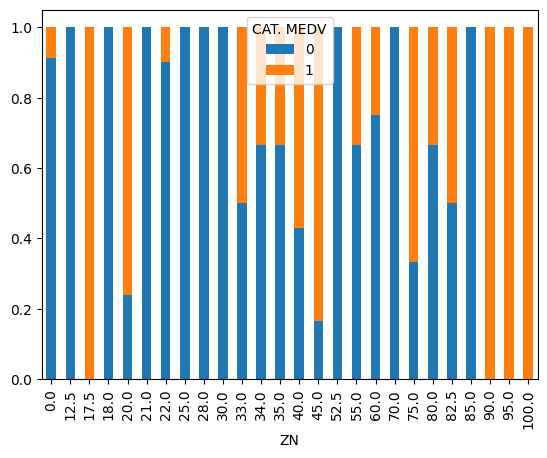

In [20]:
##Distribution of a variables' categories, similar bars indicate low seperation between classes
#Create a cross-tabulation of two variables
tbl = pd.crosstab(bostonHousing_df['CAT. MEDV'], bostonHousing_df['ZN'])

#convert numbers to ratios
propTBL = tbl / tbl.sum()
propTBL.round(2)

#plot ratios in a stacked bar chart
ax = propTBL.transpose().plot(kind='bar', stacked=True)
ax.set_yticklabels(['{:,.0\%}'.format(x) for x in ax.get_yticks()])
plt.title('Distribution of CAT.MEDV by ZN')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [27]:
##Principal Component Analysis

#Load dataset
cereals_df = pd.read_csv('../../.venv/lib/Datasets/Cereals.csv')
pcs = PCA(n_components=2)
pcs.fit(cereals_df[['calories' , 'rating']])
pcsSummary = pd.DataFrame({'Standard Deviation':np.sqrt(pcs.explained_variance_),
                           'Proportion of variance':pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary = pcsSummary.transpose()
pcsSummary.columns = ['PC1','PC2']
pcsSummary.round(4)

,PC1,PC2
Standard Deviation,22.3165,8.8844
Proportion of variance,0.8632,0.1368
Cumulative proportion,0.8632,1.0000


In [26]:
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                columns=['PC1','PC2'],
                                index=['calories', 'rating'])
pcsComponents_df

,PC1,PC2
calories,0.847053,0.531508
rating,-0.531508,0.847053


In [24]:
scores = pd.DataFrame(pcs.transform(cereals_df[['calories', 'rating']]),
                      columns=['PC1', 'PC2'])
scores.head()


,PC1,PC2
0,-44.921528,2.197183
1,15.725265,-0.382416
2,-40.149935,-5.407212
3,-75.310772,12.999126
4,7.041508,-5.357686
